In [130]:
import pandas as pd
import numpy as np

In [131]:
dados = pd.read_csv('C:\\Users\\caiof\\OneDrive\\Área de Trabalho\dados\\emp_automovel.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\caiof\AppData\Local\Temp\ipykernel_4744\1124507117.py:1: SyntaxWarning: invalid escape sequence '\d'
  dados = pd.read_csv('C:\\Users\\caiof\\OneDrive\\Área de Trabalho\dados\\emp_automovel.csv')


In [132]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [133]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [134]:
#Arvore de decisão


In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify =y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [139]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f' Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f' Acurácia de validação: {modelo.score(x_val, y_val)}')

 Acurácia de treino: 1.0
 Acurácia de validação: 0.846441947565543


In [140]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f' Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f' Acurácia de validação: {modelo.score(x_val, y_val)}')

 Acurácia de treino: 0.9205865272938444
 Acurácia de validação: 0.9061928403449176


In [141]:
#Qual seria o max_depth ideal para cada modelo?
#Será que consigo maximizar o max_depth para encontrar o parâmetro ideal?

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  959    43]]


In [144]:
from sklearn.metrics import ConfusionMatrixDisplay

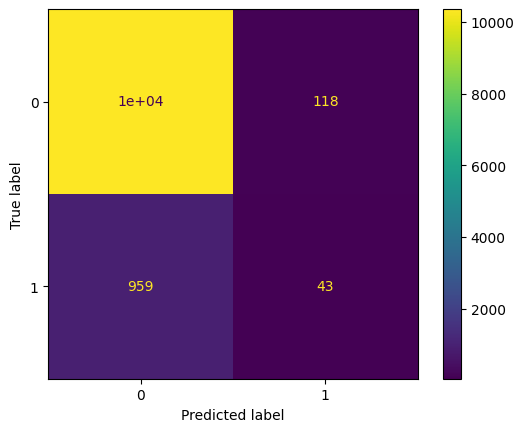

In [145]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

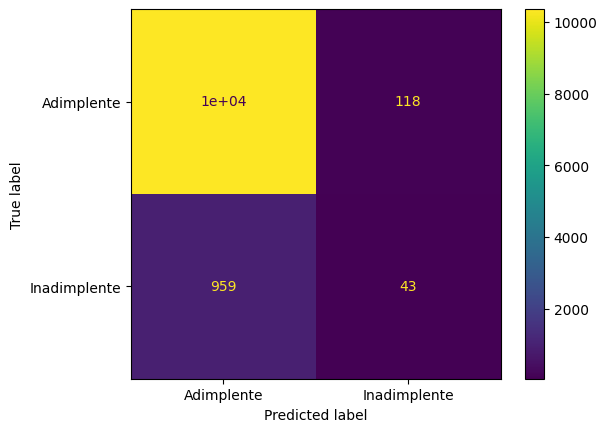

In [146]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9061928403449176


In [149]:
#Acurácia: (VP + VN)/(VP + VN + FP + FN)
#Precisao: VP / (VP + FP)
#Recall: VP/ (VP + FN)
#F1: 2 * ((precisao * recal)/(precisão + recall))

#Verificando a precisão e recall
from sklearn.metrics import precision_score, recall_score


In [150]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2670807453416149
Recall: 0.04291417165668663


In [151]:
#O nosso modelo não está indo bem, a precisão e o recall está muito próximo de zero.

#Qual é a métrica mais relevante para o problema???
#O que é mais prejudicial para a empresa, tomar prejuízo ou deixar de vender para o cliente?
#A métrica que vai avaliar se a empresa vai tomar mais prejuízo é o recall, por que ela avalia os valores reais de pessoas inadimplentes
#e quanto maior a quantidade de falsos negativos mais clientes a empresa vai vender sendo que esses clientes são inadimplentes.
#Na previsão, quanto melhor for a precisão, menos clientes serão perdidos, mas o mais prejudicial no caso será o recall.

#Com isso, vamos utilizar o recall para verificar o desempenho do nosso modelo.

#Uma métrica mais equilibrada para não perder cliente e nem tomar prejuizo seria o F1

In [152]:
from sklearn.metrics import f1_score
print(f'F1_score: {f1_score(y_val, y_previsto)}')

#valor baixo por que as nossas métricas de precisão e recall são baixas.

F1_score: 0.07394668959587274


In [153]:
#Curva ROC
#é utilizado para entender se o modelo está conseguindo diferenciar uma classe da outra

In [154]:
from sklearn.metrics import RocCurveDisplay

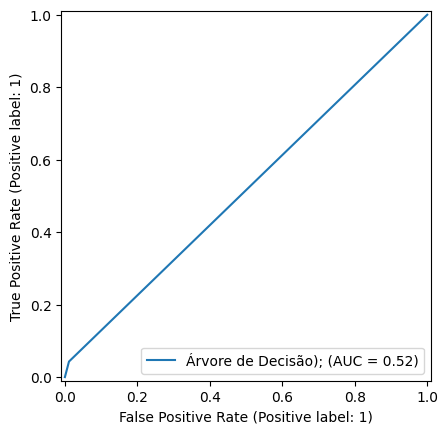

In [155]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão);')

In [156]:
#Quanto mais reta na diagonal pior vai ser o modelo
#para verificar se o modelo está classificando bem ela deve ter uma curvatura
#AUC quanto mais próximo de 1 melhor e quanto mais próximo de 0.5 pior é o modelo.

In [157]:
from sklearn.metrics import roc_auc_score

In [158]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5158267775928247


In [159]:
#Curva ROC
#Curva característica de operação do receptor
#AUC  -> Área abaixo da curva 

# 1 - Especificidade (taxa de falsos positivos) eixo x
# eixo y -> sensibilidade (taxa de verdadeiros positivos) (recall)

In [160]:

#Taxa de falsos positivos

#VN = Verdadeiros Negativos
#FP = Falsos Positivos


 #          Não     Sim
#Não         VN      FP

#Sim         FN      VP

In [161]:
#Taxa de falsos positivos

# (FP)/(VN + FP)

In [162]:
#Taxa de falsos positivos

#VN = verdadeiros negativos
#FP = falsos positivos

#  (FP)/(VN + FP)

In [163]:
#Taxa de verdaderos positivos

#FN = Falsos Negativos
#VP = Verdadeiros Positivos

# (VP)/(FN + VP)

In [164]:
#Curva de precisão X RECALL
#curva mais indicada para analisar os nossos dados, pois os nossos dados estão desbalanceados olhando para a matriz de confusão.

In [165]:
from sklearn.metrics import PrecisionRecallDisplay

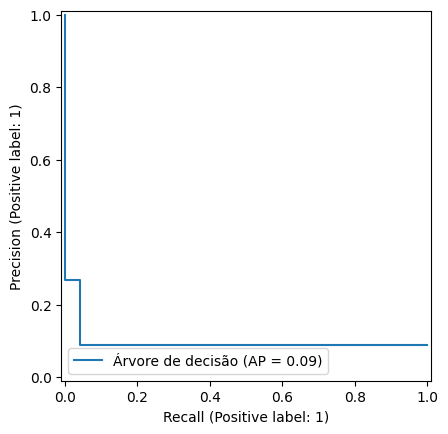

In [166]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão')

In [167]:
#Quanto maior do ponto (1,1) melhor o modelo.
#O nosso modelo não está classificando bem os dados.

In [168]:
#AP -> Precisão Média; Quanto mais próximo de zero for essa medida, pior vai ser o modelo.

In [169]:
from sklearn.metrics import average_precision_score

In [170]:
print(f'AP: { average_precision_score(y_val, y_previsto)}')

AP: 0.09499085824540142


In [171]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.27      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [173]:
  #Estratégia de Validação de dados

#Por exemplo, separamos em dados treino e teste, mas pode acontecer dos dados serem muito diferentes e com isso o modelo
#não vai conseguir classificar esses dados.

#A estratégia de validação vai separar mais os dados

#Dividindo os dados em 5 partes

#Uma parte validação e as outras 4 em treinamento
#Todas as partes são usadas como validação, vamos gerar 5 modelos com cada pedaço como validação.

#Vamos utilizar o Kfold


In [174]:
from sklearn.model_selection import cross_validate, KFold

In [175]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados


{'fit_time': array([0.31002522, 0.2690208 , 0.26601815, 0.28402257, 0.25041127]),
 'score_time': array([0.00399637, 0.00500178, 0.00400424, 0.00700092, 0.0030005 ]),
 'test_score': array([0.91322809, 0.90733885, 0.90799216, 0.91365418, 0.89982578])}

In [176]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao,1)}]')
#Acuracia

Intervalo de confiança: [0.8983788104963888, 0.9184368154579108]


In [177]:
#Validação Cruzada com o RECALL

In [178]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao,1)}]')

In [179]:
#Métrica de desempenho
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.33902669, 0.24284649, 0.22101593, 0.23801899, 0.25901604]),
 'score_time': array([0.00699997, 0.00700927, 0.00800037, 0.01200128, 0.00700474]),
 'test_score': array([0.02642008, 0.0210396 , 0.02091021, 0.01305483, 0.02427746])}

In [180]:
#intervalo de confiança

intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012056131903883655, 0.03022473979904832]


É sempre importante analisar o problema de negócio antes de avaliar um modelo de classificação, para que seja escolhida a métrica mais adequada. No nosso projeto, estamos classificando clientes inadimplentes de uma locadora de veículos e identificamos que a métrica mais relevante é o recall, que busca minimizar a quantidade de pessoas inadimplentes que são classificadas como adimplentes

Melhorando a separação dos dados [Estratificando os dados]

In [181]:
dados['inadimplente'].value_counts(normalize = True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [182]:
from sklearn.model_selection import StratifiedKFold

In [183]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.26201749, 0.23501801, 0.2350173 , 0.24056101, 0.23101783]),
 'score_time': array([0.00699949, 0.00800014, 0.00700092, 0.01000452, 0.0070014 ]),
 'test_score': array([0.03865337, 0.02746567, 0.02743142, 0.02369077, 0.02618454])}

In [184]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01834605601932653, 0.0390242510469653]


In [185]:
#Melhorando o desempenho do modelo

In [186]:
from imblearn.over_sampling import SMOTE
#Mais dados bem próximos do padrão que já existe. É usado para balancear os dados

In [187]:
oversample = SMOTE()
x_bal, y_bal = oversample.fit_resample(x, y)

In [188]:
y_bal.value_counts(normalize = True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [189]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_bal, y_bal, cv = skf, scoring = 'recall')

In [190]:
intervalo_conf(cv_resultados)
#Melhorou muito os resultados do recall
#O intuito da utilizando desse balanceamente é apenas para treinar o modelo
#para a utilização do modelo vamos utilizar em dados desbalanceados

Intervalo de confiança: [0.7213633578797454, 0.7457104057531401]


Em problemas de classificação, podemos nos deparar com bases de dados em que a variável alvo contenha classes muito desbalanceadas, ou seja, contendo categorias com frequências muito diferentes. Ao treinar um modelo com a variável desbalanceada, pode ser que o padrão dos dados para a classe dominante se sobressaia em relação aos da classe com menor frequência, gerando um modelo com desempenho muito baixo para classificar a classe de menor frequência.

Para contornar esses problemas gerados pela base de dados desbalanceada, podemos recorrer a duas soluções que consistem em equilibrar os dados da variável alvo: undersampling e oversampling. Essas estratégias são úteis para que o modelo consiga compreender melhor o padrão dos dados, mas é importante destacar que elas também possuem desvantagens e ressalvas que precisamos analisar antes de utilizá-las.

Oversampling
A estratégia de oversampling consiste em aumentar a quantidade de dados da classe que possui menor frequência até que tenha a mesma quantidade da classe de maior frequência. Dessa maneira, o modelo se atentará mais para o padrão dos dados da classe que tinha menor frequência a princípio e poderá diferenciar melhor as duas classes.

Para aumentar a quantidade de dados precisamos gerar novos registros na base de dados. É possível utilizar um oversampling aleatório para duplicar registros de maneira randômica ou usar uma técnica como o SMOTE para gerar dados sintéticos com um padrão próximo dos dados existentes. A desvantagem dessa estratégia é a possibilidade de overfitting do modelo, principalmente ao ser utilizado o oversampling aleatório. Nesse caso, o modelo pode se especializar demais no padrão dos dados que são muito parecidos ou idênticos, já que são copiados ou gerados sinteticamente.

Undersampling
A estratégia de undersampling é contrária ao oversampling, e consiste em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência. Dessa forma, o modelo não dará atenção somente aos dados de maior quantidade e poderá diferenciar melhor as duas classes.

Para reduzir a quantidade de dados, precisamos remover ou deletar registros existentes. É possível utilizar um undersampling aleatório para selecionar os registros que serão mantidos ou usar técnicas que selecionam ou removem dados a partir de um padrão estabelecido. A principal desvantagem da estratégia de undersampling é a de remover dados que podem ser muito importantes para o entendimento do problema, principalmente quando essa remoção é feita sem nenhum critério, como é o caso do undersampling aleatório.

Ambas as estratégias são válidas para a tentativa de melhorar o desempenho de um modelo de classificação, mas devemos ficar atentos ao utilizá-las devido aos pontos negativos que são inerentes a cada um dos métodos. Em qualquer projeto que seja utilizado alguma dessas ferramentas, deve ser feita uma análise para identificar se de fato elas ajudaram ou atrapalharam o desempenho do modelo de classificação.

In [191]:
#Pipeline para validação

In [192]:
from imblearn.pipeline import Pipeline as imbPipeline

In [193]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [194]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x , y, cv = skf, scoring = 'recall')

In [195]:
intervalo_conf(cv_resultados)
#Temos um resultado com valores menores, mas é o mais correto.

Intervalo de confiança: [0.18694147448741139, 0.35732457698814435]


In [196]:
#undersample

In [197]:
from imblearn.under_sampling import NearMiss

In [200]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbPipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x , y, cv = skf, scoring = 'recall')

In [202]:
intervalo_conf(cv_resultados)
#resultado assim ficou melhor do que os outros modelos

Intervalo de confiança: [0.6239484893092804, 0.6990573543836098]


O desequilíbrio de classes é um problema comum em tarefas de classificação em machine learning, como diagnósticos médicos, detecção de fraudes e detecção de anomalias, onde a frequência da ocorrência de um evento é muito baixa em relação ao todo. Uma das estratégias para lidar com esse problema de dados desequilibrados é o undersampling, que visa reduzir o número de amostras da classe com maior frequência.

Dentre os algoritmos de undersampling, podemos citar o NearMiss, que consiste em selecionar amostras da categoria em maior quantidade que possuem um padrão próximo da categoria com menor quantidade, no intuito de preservar informações importantes para a modelagem do problema. Por utilizar um critério de seleção das amostras, esse método é bem mais recomendado que a utilização de um undersampling puramente aleatório, que pode eliminar informações relevantes dos dados.

Para selecionar as amostras, esse algoritmo utiliza um método conhecido como vizinho mais próximo. Esse método é aplicado em 3 passos:

1º passo: são calculadas distâncias entre todas as amostras da classe com maior frequência e da classe com menor frequência.

2º passo: em seguida, para cada amostra da classe de menor frequência, são selecionadas n amostras da classe de maior frequência; por padrão esse número é 3 e vem daí o nome de vizinhos mais próximos. São selecionados 3 vizinhos mais próximos para cada amostra da classe de menor frequência.

3º passo: a partir dos elementos que foram selecionados, ocorre um novo processo de seleção para que fique com a mesma quantidade de elementos da classe de menor frequência. Essa seleção final possui 3 diferentes versões:

NearMiss versão 1: é calculada uma média entre as distâncias dos 3 vizinhos mais próximos de cada amostra da classe de maior frequência e são escolhidos aqueles que possuírem a menor média de distância.

NearMiss versão 2: é calculada uma média entre as distâncias dos 3 vizinhos mais distantes de cada amostra da classe de maior frequência e são escolhidos aqueles que possuírem a menor média de distância.

NearMiss versão 3: é dividido em duas etapas. Primeiramente, para cada elemento da classe de menor frequência, M vizinhos mais próximos são escolhidos e armazenados, por padrão o M também é de 3 vizinhos. Depois é calculada a média das distâncias entre os elementos armazenados e os elementos da classe de menor frequência e são escolhidos aqueles que possuírem maior média de distância.

Caso queira saber mais sobre as versões do NearMiss, consulte a documentação do imbalanced-learn: https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



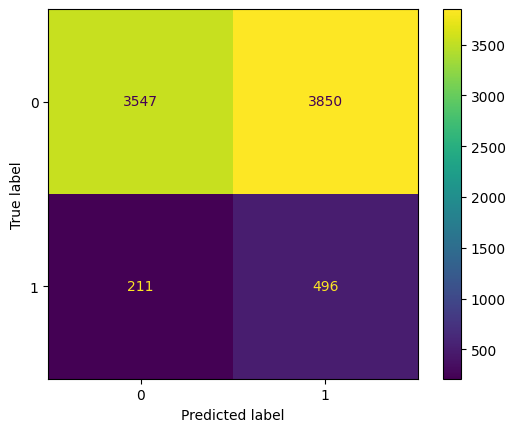

In [205]:
undersample = NearMiss(version = 3)
x_bal, y_bal = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_bal, y_bal)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto)